In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
a=pd.read_csv('data.csv')

In [3]:
b=pd.read_csv('matches.csv')

In [4]:
a

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham,1589,888,...,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,34,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,Aaron Mooy,31,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield,2327,1190,...,1.78,51,80,582,2327,0.15,144,233,-1,3
3,Aaron Ramsey,31,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,21,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield,69,14,...,1.30,69,35,0,0,0.00,-1,-1,-1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Youri Tielemans,24,862963200,1997/05/07,Premier League,2018/2019,Midfielder,Leicester,1092,575,...,1.07,84,84,546,273,0.16,80,13,-1,4
568,Yves Bissouma,25,841363200,1996/08/30,Premier League,2018/2019,Midfielder,Brighton,1769,747,...,1.53,59,63,354,0,0.25,402,293,-1,17
569,Zechariah Medley,21,962928000,2000/07/07,Premier League,2018/2019,Defender,Arsenal,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1
570,Zeze Steven Sessegnon,21,958608000,2000/05/18,Premier League,2018/2019,Defender,Fulham,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1


In [5]:
b

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,name
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,...,4,11,8,2,5,2,1,0,0,Man United - Leicester
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,...,1,11,9,7,4,1,1,0,0,Bournemouth - Cardiff
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,...,9,9,11,5,5,1,2,0,0,Fulham - Crystal Palace
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,...,4,9,8,2,5,2,1,0,0,Huddersfield - Chelsea
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,...,5,11,12,3,5,2,2,0,0,Newcastle - Tottenham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/5/19,Liverpool,Wolves,2,0,H,1,0,H,...,2,3,11,4,1,0,2,0,0,Liverpool - Wolves
376,E0,12/5/19,Man United,Cardiff,0,2,A,0,1,A,...,4,9,6,11,2,3,3,0,0,Man United - Cardiff
377,E0,12/5/19,Southampton,Huddersfield,1,1,D,1,0,H,...,3,8,6,4,3,0,1,0,0,Southampton - Huddersfield
378,E0,12/5/19,Tottenham,Everton,2,2,D,1,0,H,...,9,10,13,7,4,0,2,0,0,Tottenham - Everton


In [6]:
c=pd.DataFrame()
for team in a['Current Club'].unique():
    matches=b[b['name'].str.contains(team)]
    matches['team'] = team
    c=c.append(matches)

C:\Users\Fayez\AppData\Local\Temp/ipykernel_11856/3160450917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['team'] = team


In [7]:
c

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HC,AC,HY,AY,HR,AR,name,team
8,E0,12/8/18,Liverpool,West Ham,4,0,H,2,0,H,...,14,9,5,4,1,2,0,0,Liverpool - West Ham,West Ham
15,E0,18/08/2018,West Ham,Bournemouth,1,2,A,1,0,H,...,14,10,6,4,6,2,0,0,West Ham - Bournemouth,West Ham
20,E0,25/08/2018,Arsenal,West Ham,3,1,H,1,1,D,...,16,13,10,2,1,3,0,0,Arsenal - West Ham,West Ham
36,E0,1/9/18,West Ham,Wolves,0,1,A,0,0,D,...,10,11,4,4,2,1,0,0,West Ham - Wolves,West Ham
47,E0,16/09/2018,Everton,West Ham,1,3,A,1,2,A,...,15,12,4,2,2,5,0,0,Everton - West Ham,West Ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,E0,20/04/2019,Man City,Tottenham,1,0,H,1,0,H,...,11,11,4,4,1,2,0,0,Man City - Tottenham,Man City
348,E0,24/04/2019,Man United,Man City,0,2,A,0,0,D,...,10,10,1,1,2,2,0,0,Man United - Man City,Man City
357,E0,28/04/2019,Burnley,Man City,0,1,A,0,0,D,...,5,7,0,6,1,1,0,0,Burnley - Man City,Man City
369,E0,6/5/19,Man City,Leicester,1,0,H,0,0,D,...,12,5,11,0,3,2,0,0,Man City - Leicester,Man City


In [8]:
d=pd.DataFrame()
for player in a['full_name'].unique():
    p=player
    t=str(list(a['Current Club'][a['full_name'] == p])[0])
    matches=c[c['team'] == t]
    matches['player'] = p
    d=d.append(matches)

C:\Users\Fayez\AppData\Local\Temp/ipykernel_11856/595662809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['player'] = p


In [9]:
d

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,name,team,player
8,E0,12/8/18,Liverpool,West Ham,4,0,H,2,0,H,...,9,5,4,1,2,0,0,Liverpool - West Ham,West Ham,Aaron Cresswell
15,E0,18/08/2018,West Ham,Bournemouth,1,2,A,1,0,H,...,10,6,4,6,2,0,0,West Ham - Bournemouth,West Ham,Aaron Cresswell
20,E0,25/08/2018,Arsenal,West Ham,3,1,H,1,1,D,...,13,10,2,1,3,0,0,Arsenal - West Ham,West Ham,Aaron Cresswell
36,E0,1/9/18,West Ham,Wolves,0,1,A,0,0,D,...,11,4,4,2,1,0,0,West Ham - Wolves,West Ham,Aaron Cresswell
47,E0,16/09/2018,Everton,West Ham,1,3,A,1,2,A,...,12,4,2,2,5,0,0,Everton - West Ham,West Ham,Aaron Cresswell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,E0,13/04/2019,Man United,West Ham,2,1,H,1,0,H,...,5,3,11,1,1,0,0,Man United - West Ham,West Ham,Łukasz Fabiański
340,E0,20/04/2019,West Ham,Leicester,2,2,D,1,0,H,...,9,6,8,2,0,0,0,West Ham - Leicester,West Ham,Łukasz Fabiański
355,E0,27/04/2019,Tottenham,West Ham,0,1,A,0,0,D,...,8,2,7,0,2,0,0,Tottenham - West Ham,West Ham,Łukasz Fabiański
364,E0,4/5/19,West Ham,Southampton,3,0,H,1,0,H,...,11,2,7,1,1,0,0,West Ham - Southampton,West Ham,Łukasz Fabiański


In [10]:
d.drop_duplicates()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,name,team,player
8,E0,12/8/18,Liverpool,West Ham,4,0,H,2,0,H,...,9,5,4,1,2,0,0,Liverpool - West Ham,West Ham,Aaron Cresswell
15,E0,18/08/2018,West Ham,Bournemouth,1,2,A,1,0,H,...,10,6,4,6,2,0,0,West Ham - Bournemouth,West Ham,Aaron Cresswell
20,E0,25/08/2018,Arsenal,West Ham,3,1,H,1,1,D,...,13,10,2,1,3,0,0,Arsenal - West Ham,West Ham,Aaron Cresswell
36,E0,1/9/18,West Ham,Wolves,0,1,A,0,0,D,...,11,4,4,2,1,0,0,West Ham - Wolves,West Ham,Aaron Cresswell
47,E0,16/09/2018,Everton,West Ham,1,3,A,1,2,A,...,12,4,2,2,5,0,0,Everton - West Ham,West Ham,Aaron Cresswell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,E0,13/04/2019,Man United,West Ham,2,1,H,1,0,H,...,5,3,11,1,1,0,0,Man United - West Ham,West Ham,Łukasz Fabiański
340,E0,20/04/2019,West Ham,Leicester,2,2,D,1,0,H,...,9,6,8,2,0,0,0,West Ham - Leicester,West Ham,Łukasz Fabiański
355,E0,27/04/2019,Tottenham,West Ham,0,1,A,0,0,D,...,8,2,7,0,2,0,0,Tottenham - West Ham,West Ham,Łukasz Fabiański
364,E0,4/5/19,West Ham,Southampton,3,0,H,1,0,H,...,11,2,7,1,1,0,0,West Ham - Southampton,West Ham,Łukasz Fabiański


In [11]:
d=d[['player', 'team', 'name']].reset_index()

In [12]:
goalkeepers=list(a['full_name'][a['position'] == 'Goalkeeper'])

In [13]:
d=d[d['player'].isin(goalkeepers) == False]

In [14]:
d

,index,player,team,name
0,8,Aaron Cresswell,West Ham,Liverpool - West Ham
1,15,Aaron Cresswell,West Ham,West Ham - Bournemouth
2,20,Aaron Cresswell,West Ham,Arsenal - West Ham
3,36,Aaron Cresswell,West Ham,West Ham - Wolves
4,47,Aaron Cresswell,West Ham,Everton - West Ham
...,...,...,...,...
21655,328,Zeze Steven Sessegnon,Fulham,Fulham - Everton
21656,336,Zeze Steven Sessegnon,Fulham,Bournemouth - Fulham
21657,353,Zeze Steven Sessegnon,Fulham,Fulham - Cardiff
21658,365,Zeze Steven Sessegnon,Fulham,Wolves - Fulham


In [15]:
football=pd.read_csv('football.csv')

In [16]:
football.columns

Index(['Player Name', 'Accurate Long Balls', 'Aerial Battles Lost',
       'Aerial Battles Won', 'Appearances', 'Assists', 'Attack',
       'Big Chances Created', 'Big Chances Missed', 'Blocked Shots', 'Catches',
       'Clean Sheets', 'Clearances', 'Clearances Off Line', 'Club',
       'Cross Accuracy %', 'Crosses', 'Defence', 'Discipline', 'Duels Lost',
       'Duels Won', 'Errors Leading To Goal', 'Fouls', 'Goal Kicks',
       'Goalkeeping', 'Goals', 'Goals Conceded', 'Goals From Freekick',
       'Goals Per Match', 'Goals With Header', 'Goals With Left Foot',
       'Goals With Right Foot', 'Headed Clearance', 'High Claims',
       'Hit Woodwork', 'Interceptions', 'Last Man Tackles', 'Losses',
       'Offsides', 'Own Goals', 'Passes', 'Passes Per Match',
       'Penalties Saved', 'Penalties Scored', 'Position', 'Punches',
       'Recoveries', 'Red Cards', 'Saves', 'Shooting Accuracy %', 'Shots',
       'Shots On Target', 'Successful /s', 'Successful 0/0s',
       'Successful 5/5s',

In [17]:
football=football[football['Player Name'].isin(goalkeepers) == False]

In [18]:
football

,Player Name,Accurate Long Balls,Aerial Battles Lost,Aerial Battles Won,Appearances,Assists,Attack,Big Chances Created,Big Chances Missed,Blocked Shots,...,Successful 5/5s,Successful 50/50s,Sweeper Clearances,Tackle Success %,Tackles,Team Play,Through Balls,Throw Outs,Wins,Yellow Cards
0,Rolando Aarons,7.0,9,6,14,1,NaN,1,0,2,...,0,10,0,63.0,16,NaN,0,0,3,2
1,Tammy Abraham,NaN,0,0,7,0,NaN,1,2,4,...,0,0,0,NaN,5,NaN,0,0,1,0
2,Charlie Adam,784.0,148,216,196,25,NaN,39,6,118,...,0,156,0,79.0,304,NaN,61,0,64,46
3,Adrián,862.0,0,0,106,0,0.0,0,0,0,...,0,0,84,NaN,0,NaN,0,433,38,7
4,Ibrahim Afellay,72.0,20,15,43,2,NaN,4,2,12,...,0,0,0,80.0,30,NaN,4,0,17,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,Davide Zappacosta,0.0,0,0,1,0,NaN,0,0,0,...,0,0,0,0.0,0,NaN,0,0,1,0
623,Mauro Zárate,NaN,0,0,43,2,NaN,1,2,24,...,0,0,0,NaN,42,NaN,0,0,13,4
624,Marvin Zeegelaar,0.0,0,0,0,0,NaN,0,0,0,...,0,0,0,0.0,0,NaN,0,0,0,0
625,Oleksandr Zinchenko,0.0,0,0,0,0,NaN,0,0,0,...,0,0,0,0.0,0,NaN,0,0,0,0


In [19]:
a=a[a['full_name'].isin(goalkeepers) == False]

In [20]:
a

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham,1589,888,...,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,34,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,Aaron Mooy,31,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield,2327,1190,...,1.78,51,80,582,2327,0.15,144,233,-1,3
3,Aaron Ramsey,31,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,21,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield,69,14,...,1.30,69,35,0,0,0.00,-1,-1,-1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Yoshinori Muto,29,711158400,1992/07/15,Premier League,2018/2019,Forward,Newcastle,516,180,...,1.74,52,30,516,0,0.17,113,290,-1,8
567,Youri Tielemans,24,862963200,1997/05/07,Premier League,2018/2019,Midfielder,Leicester,1092,575,...,1.07,84,84,546,273,0.16,80,13,-1,4
568,Yves Bissouma,25,841363200,1996/08/30,Premier League,2018/2019,Midfielder,Brighton,1769,747,...,1.53,59,63,354,0,0.25,402,293,-1,17
569,Zechariah Medley,21,962928000,2000/07/07,Premier League,2018/2019,Defender,Arsenal,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1


In [21]:
merged=a.merge(d, how='inner', left_on='full_name', right_on='player')
merged=merged.merge(football, how='inner', left_on='full_name', right_on='Player Name')

In [22]:
merged

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,Successful 5/5s,Successful 50/50s,Sweeper Clearances,Tackle Success %,Tackles,Team Play,Through Balls,Throw Outs,Wins,Yellow Cards
0,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham,1589,888,...,0,38,0,65.0,106,NaN,3,0,37,8
1,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham,1589,888,...,0,38,0,65.0,106,NaN,3,0,37,8
2,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham,1589,888,...,0,38,0,65.0,106,NaN,3,0,37,8
3,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham,1589,888,...,0,38,0,65.0,106,NaN,3,0,37,8
4,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham,1589,888,...,0,38,0,65.0,106,NaN,3,0,37,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9381,Xherdan Shaqiri,30,687052800,1991/10/10,Premier League,2018/2019,Midfielder,Liverpool,1058,538,...,0,81,0,59.0,39,NaN,34,0,19,5
9382,Xherdan Shaqiri,30,687052800,1991/10/10,Premier League,2018/2019,Midfielder,Liverpool,1058,538,...,0,81,0,59.0,39,NaN,34,0,19,5
9383,Xherdan Shaqiri,30,687052800,1991/10/10,Premier League,2018/2019,Midfielder,Liverpool,1058,538,...,0,81,0,59.0,39,NaN,34,0,19,5
9384,Xherdan Shaqiri,30,687052800,1991/10/10,Premier League,2018/2019,Midfielder,Liverpool,1058,538,...,0,81,0,59.0,39,NaN,34,0,19,5


In [23]:
finalnames=list(merged['full_name'].unique())

In [24]:
a=a[a['full_name'].isin(finalnames) == True]
d=d[d['player'].isin(finalnames) == True]
football = football[football['Player Name'].isin(finalnames) == True]

In [25]:
a=a[['full_name', 'age', 'Current Club', 'goals_home', 'goals_away']]

In [26]:
a['goals'] = a['goals_home']+a['goals_away']

In [27]:
football

,Player Name,Accurate Long Balls,Aerial Battles Lost,Aerial Battles Won,Appearances,Assists,Attack,Big Chances Created,Big Chances Missed,Blocked Shots,...,Successful 5/5s,Successful 50/50s,Sweeper Clearances,Tackle Success %,Tackles,Team Play,Through Balls,Throw Outs,Wins,Yellow Cards
10,Nathan Aké,57.0,52,71,46,1,NaN,3,0,5,...,0,14,0,68.0,114,NaN,1,0,21,6
12,Marc Albrighton,227.0,147,41,180,26,NaN,42,12,55,...,0,200,0,78.0,316,NaN,10,0,61,22
13,Toby Alderweireld,632.0,132,146,99,2,NaN,2,0,20,...,0,21,0,78.0,136,NaN,4,0,56,10
15,Trent Alexander-Arnold,23.0,2,2,10,0,NaN,1,0,1,...,0,4,0,62.0,13,NaN,0,0,5,2
20,Marcos Alonso,110.0,83,129,61,4,NaN,5,0,24,...,0,47,0,74.0,146,NaN,5,0,40,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Pablo Zabaleta,337.0,264,327,235,19,NaN,27,0,48,...,0,64,0,74.0,805,NaN,21,0,135,57
620,Wilfried Zaha,49.0,75,40,115,13,NaN,18,14,41,...,0,394,0,79.0,183,NaN,10,0,34,15
622,Davide Zappacosta,0.0,0,0,1,0,NaN,0,0,0,...,0,0,0,0.0,0,NaN,0,0,1,0
625,Oleksandr Zinchenko,0.0,0,0,0,0,NaN,0,0,0,...,0,0,0,0.0,0,NaN,0,0,0,0


In [28]:
football=football[['Player Name', 'Shots', 'Blocked Shots', 'Shots On Target', 'Passes', 'Tackles', 'Offsides', 'Fouls', 'Interceptions', 'Penalties Scored', 'Wins', 'Losses', 'Red Cards', 'Yellow Cards']]

In [29]:
football

,Player Name,Shots,Blocked Shots,Shots On Target,Passes,Tackles,Offsides,Fouls,Interceptions,Penalties Scored,Wins,Losses,Red Cards,Yellow Cards
10,Nathan Aké,0,5,0,1336,114,0,37,99,0,21,20,1,6
12,Marc Albrighton,174,55,55,3649,316,12,131,202,0,61,68,0,22
13,Toby Alderweireld,0,20,0,5100,136,1,34,125,0,56,19,0,10
15,Trent Alexander-Arnold,0,1,0,196,13,1,3,9,0,5,2,0,2
20,Marcos Alonso,0,24,0,2367,146,5,58,107,0,40,14,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Pablo Zabaleta,0,48,0,9632,805,18,301,490,0,135,54,4,57
620,Wilfried Zaha,135,41,48,1820,183,25,147,88,0,34,56,0,15
622,Davide Zappacosta,0,0,0,10,0,0,0,0,0,1,0,0,0
625,Oleksandr Zinchenko,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
a

,full_name,age,Current Club,goals_home,goals_away,goals
0,Aaron Cresswell,32,West Ham,0,0,0
1,Aaron Lennon,34,Burnley,1,0,1
2,Aaron Mooy,31,Huddersfield,1,2,3
3,Aaron Ramsey,31,Arsenal,2,2,4
6,Abdelhamid Sabiri,25,Huddersfield,0,0,0
...,...,...,...,...,...,...
556,Wesley Hoedt,27,Southampton,0,0,0
558,Wilfried Zaha,29,Crystal Palace,1,9,10
559,Will Hughes,26,Watford,1,1,2
561,Willian,33,Chelsea,2,1,3


In [31]:
data=a.merge(football, how='inner', left_on='full_name', right_on='Player Name')

In [32]:
data=data.drop(['Player Name'], axis=1)

In [33]:
data.to_csv('data_final.csv', index=False)

In [34]:
len(d['player'].unique())

247

In [35]:
d['rating'] = np.random.uniform(low=4, high=10, size=(len(d),))

C:\Users\Fayez\AppData\Local\Temp/ipykernel_11856/68033646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['rating'] = np.random.uniform(low=4, high=10, size=(len(d),))


In [36]:
d=d.rename(columns={'name':'match name'})

In [37]:
import random
goals=[]
for i in range(len(d)):
    goals.append(random.randrange(3))

In [38]:
d['goals'] = goals

In [39]:
shots_off_target=[]
for i in range(len(d)):
    shots_off_target.append(random.randrange(4))

In [40]:
d['shots_off_target'] = shots_off_target

In [41]:
shots_on_target_blocked = []
for i in range(len(d)):
    shots_on_target_blocked.append(random.randrange(4))

In [42]:
d['shots on target blocked'] = shots_on_target_blocked

In [43]:
d=d.rename(columns={'shots_off_target':'shots off target'})

In [44]:
d

,index,player,team,match name,rating,goals,shots off target,shots on target blocked
0,8,Aaron Cresswell,West Ham,Liverpool - West Ham,7.870318,1,1,3
1,15,Aaron Cresswell,West Ham,West Ham - Bournemouth,7.685077,1,3,2
2,20,Aaron Cresswell,West Ham,Arsenal - West Ham,4.992536,2,0,3
3,36,Aaron Cresswell,West Ham,West Ham - Wolves,7.197879,2,2,2
4,47,Aaron Cresswell,West Ham,Everton - West Ham,4.533371,0,0,3
...,...,...,...,...,...,...,...,...
21389,333,Xherdan Shaqiri,Liverpool,Liverpool - Chelsea,6.725252,1,1,3
21390,343,Xherdan Shaqiri,Liverpool,Cardiff - Liverpool,6.650422,0,3,1
21391,350,Xherdan Shaqiri,Liverpool,Liverpool - Huddersfield,8.655763,2,3,2
21392,363,Xherdan Shaqiri,Liverpool,Newcastle - Liverpool,7.271280,1,1,3


In [46]:
list(d['team'].unique())

['West Ham',
 'Burnley',
 'Huddersfield',
 'Arsenal',
 'Watford',
 'Bournemouth',
 'Everton',
 'Liverpool',
 'Fulham',
 'Man United',
 'Chelsea',
 'Crystal Palace',
 'Brighton',
 'Leicester',
 'Man City',
 'Southampton',
 'Tottenham',
 'Newcastle',
 'Cardiff']

In [68]:
df=d

In [69]:
df

,index,player,team,match name,rating,goals,shots off target,shots on target blocked
0,8,Aaron Cresswell,West Ham,Liverpool - West Ham,7.870318,1,1,3
1,15,Aaron Cresswell,West Ham,West Ham - Bournemouth,7.685077,1,3,2
2,20,Aaron Cresswell,West Ham,Arsenal - West Ham,4.992536,2,0,3
3,36,Aaron Cresswell,West Ham,West Ham - Wolves,7.197879,2,2,2
4,47,Aaron Cresswell,West Ham,Everton - West Ham,4.533371,0,0,3
...,...,...,...,...,...,...,...,...
21389,333,Xherdan Shaqiri,Liverpool,Liverpool - Chelsea,6.725252,1,1,3
21390,343,Xherdan Shaqiri,Liverpool,Cardiff - Liverpool,6.650422,0,3,1
21391,350,Xherdan Shaqiri,Liverpool,Liverpool - Huddersfield,8.655763,2,3,2
21392,363,Xherdan Shaqiri,Liverpool,Newcastle - Liverpool,7.271280,1,1,3


In [113]:
match_name_short=[]
for i in d['match name']:
    if len(i)>17:
        name=i[0:18]+'...'
    else:
        name = i
    match_name_short.append(name) 

In [114]:
d['match short'] = match_name_short

In [134]:
d=d.replace(' - ', '-')

In [135]:
d.to_csv('rating.csv', index=False)

In [76]:
df=d[d['player'] == 'Mohamed Salah']
dff=df.melt(id_vars=['match name'], value_vars=['goals', 'shots off target', 'shots on target blocked'])

In [77]:
dff

,match name,variable,value
0,Liverpool - West Ham,goals,1
1,Crystal Palace - Liverpool,goals,1
2,Liverpool - Brighton,goals,0
3,Leicester - Liverpool,goals,1
4,Tottenham - Liverpool,goals,1
...,...,...,...
109,Liverpool - Chelsea,shots on target blocked,3
110,Cardiff - Liverpool,shots on target blocked,1
111,Liverpool - Huddersfield,shots on target blocked,2
112,Newcastle - Liverpool,shots on target blocked,2


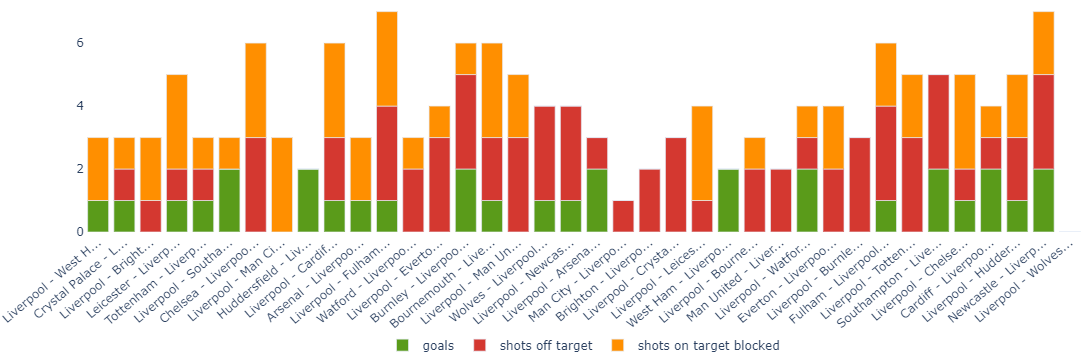

In [133]:
df=d[d['player'] == 'Mohamed Salah']
dff=df.melt(id_vars=['match name', 'match short'], value_vars=['goals', 'shots off target', 'shots on target blocked'])
dff.columns=['Match', 'match short', 'Shot type', 'Number of shots']
fig=px.bar(dff, x='Match', y='Number of shots', color='Shot type', color_discrete_sequence=['#5A9B1A', '#D43830', '#FF8F00'])
fig.update_layout(margin=dict(t=0, l=0, r=0, b=10),
                plot_bgcolor="white",
                paper_bgcolor="white",
                legend=dict(
                        orientation="h",
                        yanchor="bottom",
                        y=-0.55,
                        xanchor="center",
                        x=0.5,
                        title=""
                    ),
                 xaxis = dict(
                        tickmode = 'array',
                        tickvals = list(range(len(dff['match short'].unique()))),
                        ticktext = dff['match short']
                    ),
                 )
fig.update_xaxes( title='', tickangle=320)
fig.update_yaxes(title='')
fig.show()

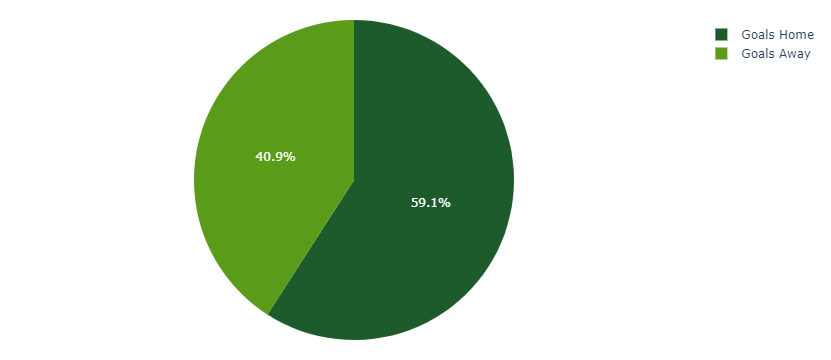

In [151]:
data=pd.read_csv('data_final.csv')
df=data[data['full_name'] == 'Mohamed Salah']
names=['Goals Home', 'Goals Away']
values=[int(list(df['goals_home'])[0]),int(list(df['goals_away'])[0])]
fig=px.pie(df, names=names, values=values, color_discrete_sequence=['#1D5B2C', '#5A9B1A'])
fig.update_layout(margin=dict(t=20, r=20, b=20, l=20))
fig.show()

In [195]:
data['goals_home'] = data['goals_home'].replace(2, random.randrange(7))
data['goals_away'] = data['goals_away'].replace(4, random.randrange(5))
data['goals'] = data['goals_home']+data['goals_away']

In [196]:
data.to_csv('data_final.csv', index=False)

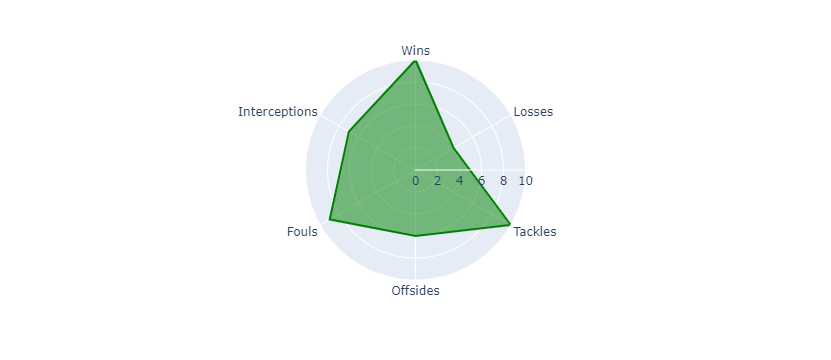

In [163]:
df=data[data['full_name'] == 'Mohamed Salah']
names=['Wins', 'Losses', 'Tackles', 'Offsides', 'Fouls', 'Interceptions']
values=[int(list(df['Wins'])[0]),
        int(list(df['Losses'])[0]), 
        int(list(df['Tackles'])[0]),
        int(list(df['Offsides'])[0]),
        int(list(df['Fouls'])[0]),
        int(list(df['Interceptions'])[0])]
fig = px.line_polar(r=values, theta=names, line_close=True, color_discrete_sequence=['#303F1C'])
fig.update_traces(fill='toself')
fig.show()

In [171]:
df=data[data['full_name'] == 'Mohamed Salah']
names=['Wins', 'Losses', 'Tackles', 'Offsides', 'Fouls', 'Interceptions']
values=[int(list(df['Wins'])[0]),
        int(list(df['Losses'])[0]), 
        int(list(df['Tackles'])[0]),
        int(list(df['Offsides'])[0]),
        int(list(df['Fouls'])[0]),
        int(list(df['Interceptions'])[0])]
fig = px.treemap(
    names = names,
    parents = [""]*len(names),
    values=values,
    color_discrete_sequence=['#1D5B2C', '#5A9B1A', 'green']
)
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

In [169]:
values

[10, 4, 10, 6, 9, 7]

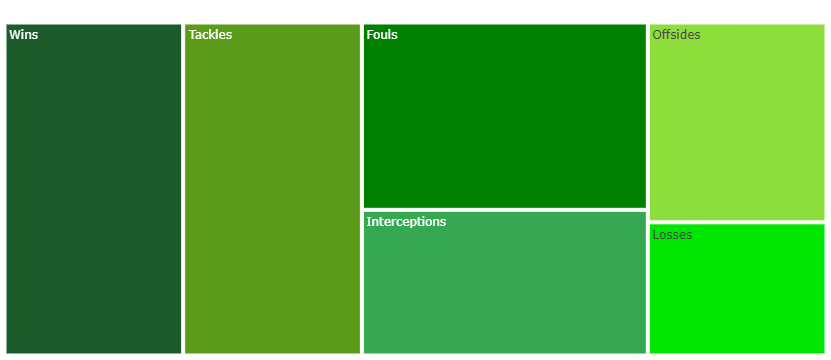

In [194]:
fig = px.treemap(
    names = names,
    parents = [""]*len(names),
    values=values,
    color_discrete_sequence=['#1D5B2C', '#5A9B1A', 'green']
)
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()